# Airbnb House Analysis and Recommender Application

##### Jie Bao, Kuangyi Zhang, Lanny Xu
##### Dr. Bamshad Mobasher, Spring 2018

### Import Library

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import *
from sklearn import neighbors, tree, naive_bayes, cross_validation
from sklearn.cross_validation import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import cross_validation
import operator

Populating the interactive namespace from numpy and matplotlib


/Users/Lanny/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Lanny/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/Lanny/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20

### Read in data and preprocessing

#### Read in data

In [2]:
listings = pd.read_table("listings_edited.csv", index_col=0, header='infer', delimiter=",")
print listings.shape
listings.head(5)

(5207, 38)


,listing_url,name,summary,picture_url,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,state,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
13824783,https://www.airbnb.com/rooms/13824783,Full floor of a city cottage (up to 4 guests),This 3rd-floor garrett apartment (built-out at...,https://a0.muscache.com/im/pictures/510d45f8-e...,within an hour,100%,t,t,Lincoln Square,IL,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,moderate,2.57
16740225,https://www.airbnb.com/rooms/16740225,Guest Room of Two Bedroom Condo,Warm and secure room in a Two Bedroom Condo lo...,https://a0.muscache.com/im/pictures/697182d3-d...,within an hour,100%,f,t,Lincoln Square,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,strict,NaN
18125245,https://www.airbnb.com/rooms/18125245,"Cozy, spacious 2 flat in Lincoln Square!","This cute, spacious 2 flat in Lincoln Square i...",https://a0.muscache.com/im/pictures/bf761217-c...,within an hour,100%,f,t,Lincoln Square,IL,...,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,4.00
8362570,https://www.airbnb.com/rooms/8362570,Lincoln Square Ravenswood,"Lincoln square, Ravenswood and Andersonville g...",https://a0.muscache.com/im/pictures/224a38c0-a...,within a few hours,100%,t,t,Lincoln Square,IL,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,0.87
789867,https://www.airbnb.com/rooms/789867,Cozy Private Room in a Classic Chicago Appartm...,$40 OFF COUPON FOR ALL NEW AIRBNB GUESTS - VIS...,https://a0.muscache.com/im/pictures/72031963/0...,within an hour,100%,f,t,Lincoln Square,IL,...,94.0,9.0,9.0,10.0,10.0,10.0,9.0,t,strict,1.96


In [3]:
listings.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
listing_url,5207,5207,https://www.airbnb.com/rooms/6558625,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,5206,5169,Wells St Suites - Old Town 3 Bed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
summary,5125,4841,This property offers luxury in Chicago’s trend...,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
picture_url,5207,5202,https://a0.muscache.com/im/pictures/70087089/b...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_time,4951,4,within an hour,3257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,4951,55,100%,3873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,5207,2,f,3840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_identity_verified,5207,2,t,4093,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_cleansed,5207,72,West Town,729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,5207,3,IL,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
listings.dtypes

listing_url                     object
name                            object
summary                         object
picture_url                     object
host_response_time              object
host_response_rate              object
host_is_superhost               object
host_identity_verified          object
neighbourhood_cleansed          object
state                           object
city                            object
zipcode                         object
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
amenities                       object
price                           object
security_deposit                object
cleaning_fee                    object
guests_included                  int64
extra_people                    object
minimum_nights           

#### Drop unwanted attributes

In [5]:
# state, city, zipcode, drop neighbourhood_cleansed, reviews_per_month
listings_edit = listings.drop(['state', 'city', 'zipcode', 'neighbourhood_cleansed', 'reviews_per_month'], axis=1)

#### Handle missing values

Remove listing without review data

In [6]:
listings_edit = listings_edit.dropna(subset=['host_response_time','host_response_rate','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'])

In [7]:
listings_edit.shape

(4273, 33)

Fill in missing values

In [8]:
# rooms
listings_edit = listings_edit.fillna({"bathrooms": "0", "bedrooms": "0", "beds": "0"})

In [9]:
# fee
listings_edit = listings_edit.fillna({"price": "$0", "security_deposit": "$0", "cleaning_fee": "$0", "extra_people": "$0"})

#### Transfer object to numeric values

In [10]:
# list all object columns
obj_listings_edit = listings_edit.select_dtypes(include=['object']).copy()
obj_listings_edit.head()

,listing_url,name,summary,picture_url,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,...,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,extra_people,instant_bookable,cancellation_policy
id,,,,,,,,,,,,,,,,,,,,,
13824783,https://www.airbnb.com/rooms/13824783,Full floor of a city cottage (up to 4 guests),This 3rd-floor garrett apartment (built-out at...,https://a0.muscache.com/im/pictures/510d45f8-e...,within an hour,100%,t,t,House,Private room,...,1,2,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",$56.00,$0,$30.00,$15.00,t,moderate
18125245,https://www.airbnb.com/rooms/18125245,"Cozy, spacious 2 flat in Lincoln Square!","This cute, spacious 2 flat in Lincoln Square i...",https://a0.muscache.com/im/pictures/bf761217-c...,within an hour,100%,f,t,Townhouse,Private room,...,2,3,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$80.00,$150.00,$65.00,$15.00,f,moderate
8362570,https://www.airbnb.com/rooms/8362570,Lincoln Square Ravenswood,"Lincoln square, Ravenswood and Andersonville g...",https://a0.muscache.com/im/pictures/224a38c0-a...,within a few hours,100%,t,t,Condominium,Private room,...,1,1,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$80.00,$0,$10.00,$10.00,f,flexible
789867,https://www.airbnb.com/rooms/789867,Cozy Private Room in a Classic Chicago Appartm...,$40 OFF COUPON FOR ALL NEW AIRBNB GUESTS - VIS...,https://a0.muscache.com/im/pictures/72031963/0...,within an hour,100%,f,t,Apartment,Private room,...,1,1,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$20.00,$0,$0,$10.00,t,strict
16701336,https://www.airbnb.com/rooms/16701336,Master Bedroom of Two Bedroom Condo,Warm and secure room in a Two Bedroom Condo lo...,https://a0.muscache.com/im/pictures/83ff781b-f...,within an hour,100%,f,t,Condominium,Private room,...,1,1,Real Bed,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",$28.00,$0,$35.00,$20.00,t,strict


Transfer categorical to numerical values using manually input

In [11]:
# host_response_time
# check counts for each type
listings_edit["host_response_time"].value_counts()

within an hour        2865
within a few hours     802
within a day           580
a few days or more      26
Name: host_response_time, dtype: int64

In [12]:
# replace the value manually
response_time_num = {"host_response_time": {"within an hour": 0, "within a few hours": 1, 
                                                "within a day": 2, "a few days or more": 3, "none": 4}}
listings_edit.replace(response_time_num, inplace=True)

In [13]:
listings_edit["host_response_time"].value_counts()

0    2865
1     802
2     580
3      26
Name: host_response_time, dtype: int64

In [14]:
# host_is_superhost
listings_edit["host_is_superhost"].value_counts()

f    2989
t    1284
Name: host_is_superhost, dtype: int64

In [15]:
superhost_num = {"host_is_superhost": {"t": 1, "f": 0}}
listings_edit.replace(superhost_num, inplace=True)

In [16]:
print listings_edit["host_is_superhost"].value_counts()

0    2989
1    1284
Name: host_is_superhost, dtype: int64


Transfer categorical to numerical values using sklearn.LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder  

In [18]:
# host_id_verified
le = LabelEncoder()
print listings_edit["host_identity_verified"].value_counts()
listings_edit["host_identity_verified"] = le.fit_transform(listings_edit["host_identity_verified"])
print listings_edit["host_identity_verified"].value_counts()

t    3488
f     785
Name: host_identity_verified, dtype: int64
1    3488
0     785
Name: host_identity_verified, dtype: int64


In [19]:
# property_type_code
print listings_edit["property_type"].value_counts()
listings_edit["property_type"] = le.fit_transform(listings_edit["property_type"])
print listings_edit["property_type"].value_counts()

Apartment             2911
House                  639
Condominium            466
Loft                    88
Townhouse               72
Other                   26
Guesthouse              13
Bed & Breakfast         12
Dorm                    12
Boat                     8
Guest suite              5
Bungalow                 5
Hostel                   4
Boutique hotel           4
Villa                    3
In-law                   2
Timeshare                1
Vacation home            1
Serviced apartment       1
Name: property_type, dtype: int64
0     2911
10     639
5      466
12      88
16      72
13      26
8       13
6       12
1       12
2        8
7        5
4        5
3        4
9        4
18       3
11       2
15       1
14       1
17       1
Name: property_type, dtype: int64


In [20]:
# room_type_code
print listings_edit["room_type"].value_counts()
listings_edit["room_type"] = le.fit_transform(listings_edit["room_type"])
print listings_edit["room_type"].value_counts()

Entire home/apt    2544
Private room       1602
Shared room         127
Name: room_type, dtype: int64
0    2544
1    1602
2     127
Name: room_type, dtype: int64


In [21]:
# bed_type_code
print listings_edit["bed_type"].value_counts()
listings_edit["bed_type"] = le.fit_transform(listings_edit["bed_type"])
print listings_edit["bed_type"].value_counts()

Real Bed         4126
Airbed             56
Futon              48
Pull-out Sofa      27
Couch              16
Name: bed_type, dtype: int64
4    4126
0      56
2      48
3      27
1      16
Name: bed_type, dtype: int64


Transfer categorical to numerical values using pandas LabelEncoding

In [22]:
# instant_bookable
print listings_edit["instant_bookable"].value_counts()
listings_edit["instant_bookable"] = listings_edit["instant_bookable"].astype('category')
listings_edit["instant_bookable"] = listings_edit["instant_bookable"].cat.codes
print listings_edit["instant_bookable"].value_counts()

f    3035
t    1238
Name: instant_bookable, dtype: int64
0    3035
1    1238
Name: instant_bookable, dtype: int64


In [23]:
# cancellation_policy
print listings_edit["cancellation_policy"].value_counts()

listings_edit["cancellation_policy"] = listings_edit["cancellation_policy"].astype('category')
listings_edit["cancellation_policy"] = listings_edit["cancellation_policy"].cat.codes

print listings_edit["cancellation_policy"].value_counts()

strict             1946
moderate           1372
flexible            949
super_strict_30       5
super_strict_60       1
Name: cancellation_policy, dtype: int64
2    1946
1    1372
0     949
3       5
4       1
Name: cancellation_policy, dtype: int64


Transfer strings to integers

In [24]:
listings_edit['bathrooms'] = listings_edit['bathrooms'].astype('int')
listings_edit['bedrooms'] = listings_edit['bedrooms'].astype('int')
listings_edit[ 'beds'] = listings_edit[ 'beds'].astype('int')

Transfer percentages to integers

In [25]:
listings_edit['host_response_rate'] = listings_edit['host_response_rate'].str[:-1].astype('int')

In [26]:
listings_edit['host_response_rate'].head()

id
13824783    100
18125245    100
8362570     100
789867      100
16701336    100
Name: host_response_rate, dtype: int64

Transfer dollar prices to floats

In [27]:
listings_edit[['price']] = (listings_edit['price'].replace( '[\$,)]','', regex=True ).astype(float))
listings_edit[['security_deposit']] = (listings_edit['security_deposit'].replace( '[\$,)]','', regex=True ).astype(float))
listings_edit[['cleaning_fee']] = (listings_edit['cleaning_fee'].replace( '[\$,)]','', regex=True ).astype(float))
listings_edit[['extra_people']] = (listings_edit['extra_people'].replace( '[\$,)]','', regex=True ).astype(float))

#### Extract amenities values and add new columns

In [28]:
# TV, wireless internet, air condition, heating, pets, washer, dryer
attrs = ['TV', 'Internet', 'Air conditioning', 'Kitchen' , 'Heating', 'Washer', 'Dryer']
rows = listings_edit.shape[0]
for attr in attrs:
    listings_edit[attr] = pd.Series(np.zeros(rows), index=listings_edit.index).astype(integer)
print listings_edit.amenities[13824783]
print listings_edit.TV[13824783]
print listings_edit.Kitchen[13824783]

{TV,"Cable TV","Wireless Internet","Air conditioning",Kitchen,"Free parking on premises",Breakfast,"Pets live on this property",Dog(s),Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door","24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Room-darkening shades"}
0
0


In [29]:
for index, row in listings_edit.iterrows():
    for attr in attrs:
        if (row['amenities'].find(attr)>=0):
            listings_edit.set_value(index, attr, 1)
print listings_edit.amenities[13824783]
print listings_edit.TV[13824783]
print listings_edit.Kitchen[13824783]

/Users/Lanny/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


{TV,"Cable TV","Wireless Internet","Air conditioning",Kitchen,"Free parking on premises",Breakfast,"Pets live on this property",Dog(s),Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door","24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Room-darkening shades"}
1
1


In [30]:
#check with the objects now
obj_listings_edit = listings_edit.select_dtypes(include=['object']).copy()
obj_listings_edit.head()

,listing_url,name,summary,picture_url,amenities
id,,,,,
13824783,https://www.airbnb.com/rooms/13824783,Full floor of a city cottage (up to 4 guests),This 3rd-floor garrett apartment (built-out at...,https://a0.muscache.com/im/pictures/510d45f8-e...,"{TV,""Cable TV"",""Wireless Internet"",""Air condit..."
18125245,https://www.airbnb.com/rooms/18125245,"Cozy, spacious 2 flat in Lincoln Square!","This cute, spacious 2 flat in Lincoln Square i...",https://a0.muscache.com/im/pictures/bf761217-c...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
8362570,https://www.airbnb.com/rooms/8362570,Lincoln Square Ravenswood,"Lincoln square, Ravenswood and Andersonville g...",https://a0.muscache.com/im/pictures/224a38c0-a...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
789867,https://www.airbnb.com/rooms/789867,Cozy Private Room in a Classic Chicago Appartm...,$40 OFF COUPON FOR ALL NEW AIRBNB GUESTS - VIS...,https://a0.muscache.com/im/pictures/72031963/0...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
16701336,https://www.airbnb.com/rooms/16701336,Master Bedroom of Two Bedroom Condo,Warm and secure room in a Two Bedroom Condo lo...,https://a0.muscache.com/im/pictures/83ff781b-f...,"{TV,""Wireless Internet"",""Air conditioning"",Kit..."


#### Extract attributes for feature analysis

In [31]:
listings_eval = listings_edit.drop(['listing_url','name','summary','picture_url','amenities', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'], axis=1)

In [32]:
listings_eval.head()

,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,review_scores_rating,instant_bookable,cancellation_policy,TV,Internet,Air conditioning,Kitchen,Heating,Washer,Dryer
id,,,,,,,,,,,,,,,,,,,,,
13824783,0,100,1,1,10,1,4,1,1,2,...,99.0,1,1,1,1,1,1,1,1,1
18125245,0,100,0,1,16,1,6,1,2,3,...,95.0,0,1,1,1,1,1,1,1,1
8362570,1,100,1,1,5,1,2,1,1,1,...,98.0,0,0,1,1,1,1,1,1,1
789867,0,100,0,1,0,1,3,1,1,1,...,94.0,1,2,1,1,1,1,1,1,1
16701336,0,100,0,1,5,1,2,1,1,1,...,100.0,1,2,1,1,1,1,1,1,1


## Feature Selection

#### Split data and target attributes

In [38]:
# Feature analysis
target = np.array(listings_eval['review_scores_rating'])
data = listings_eval.drop(['review_scores_rating'], axis=1)
print data.T.shape

(28, 4273)


In [40]:
from sklearn.cross_validation import train_test_split
fa_train, fa_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=33)

#### Define a function to compute the optimal percentile for FS

In [41]:
# Take as input the training data, target variable, the model and any other parameters
# return the optimal percentage of the most informative features to use
def calc_percent(train, target, model, interval, K):
    percentiles = range(1, 100, interval)
    results = []
    minScore = 100
    print "Percentile\tMAE"
    for i in range(1, 100, interval):
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
        train_fs = fs.fit_transform(train, target)
        scores = abs(cross_validation.cross_val_score(model, train_fs, target, cv=K, scoring='neg_mean_absolute_error'))
        # cross validation, return score array for each croos-validation
        # neg_mean_absolute_error returns negative MAE
        if (scores.mean() < minScore):
            minScore = scores.mean()
            optimal_percentile = i
        results = np.append(results, scores.mean())
        print "%d\t\t%.4f" %(i,scores.mean())
        
    print "\nOptimal percentile of features:{0}".format(optimal_percentile)
    optimal_num_features = int(optimal_percentile*len(train.T)/100)
    print "Optimal number of features:{0}".format(optimal_num_features)
    
    return optimal_percentile

In [43]:
# Try Linear regression
linreg = LinearRegression()
linreg.fit(fa_train, target_train)

lr_opPer = calc_percent(fa_train, target_train, linreg, 5, 5)

Percentile	MAE
1		3.9136
6		3.8911
11		3.8756
16		3.8712
21		3.8722
26		3.8703
31		3.8433
36		3.8394
41		3.8025
46		3.8034
51		3.8029
56		3.7666
61		3.7667
66		3.7678
71		3.7664
76		3.7655
81		3.7732
86		3.7702
91		3.7718
96		3.7743

Optimal percentile of features:76
Optimal number of features:21


In [44]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=lr_opPer)
train_lr_fs = fs.fit(fa_train, target_train)
print "Selcted features:"
print data.columns[fs.get_support()].values

Selcted features:
['host_response_rate' 'host_is_superhost' 'host_identity_verified'
 'property_type' 'accommodates' 'bathrooms' 'beds' 'bed_type' 'price'
 'guests_included' 'minimum_nights' 'number_of_reviews' 'instant_bookable'
 'cancellation_policy' 'TV' 'Internet' 'Air conditioning' 'Kitchen'
 'Heating' 'Washer' 'Dryer']


In [45]:
# Try Ridge regression
# 这里还可以试试不同的参数，像作业那样用GridSearch系统分析
rireg = Ridge(fit_intercept=True, alpha = 0.3)
rireg.fit(fa_train, target_train)

rr_opPer= calc_percent(fa_train, target_train, rireg, 5, 5)

/Users/Lanny/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.23892092534e-18 / 1.11022302463e-16
  RuntimeWarning)


Percentile	MAE
1		3.9137
6		3.8911
11		3.8756
16		3.8710
21		3.8721
26		3.8702
31		3.8432
36		3.8393
41		3.8024
46		3.8033
51		3.8028
56		3.7665
61		3.7666
66		3.7677
71		3.7663
76		3.7654
81		3.7730
86		3.7701
91		3.7717
96		3.7742

Optimal percentile of features:76
Optimal number of features:21


In [47]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=rr_opPer)
train_rr_fs = fs.fit(fa_train, target_train)
print "Selcted features:"
print data.columns[fs.get_support()].values

Selcted features:
['host_response_rate' 'host_is_superhost' 'host_identity_verified'
 'property_type' 'accommodates' 'bathrooms' 'beds' 'bed_type' 'price'
 'guests_included' 'minimum_nights' 'number_of_reviews' 'instant_bookable'
 'cancellation_policy' 'TV' 'Internet' 'Air conditioning' 'Kitchen'
 'Heating' 'Washer' 'Dryer']


In [48]:
# Try Lasso regression
lareg = Lasso(fit_intercept=True, alpha = 0.3)
lareg.fit(fa_train, target_train)

la_opPer= calc_percent(fa_train, target_train, lareg, 5, 5)

Percentile	MAE
1		3.9844
6		3.9765
11		3.9762
16		3.9762
21		3.9762
26		3.9729
31		3.9653
36		3.9630
41		3.9223
46		3.9223
51		3.9223
56		3.8956
61		3.8956
66		3.8956
71		3.8952
76		3.8952
81		3.8984
86		3.8984
91		3.8984
96		3.9006

Optimal percentile of features:71
Optimal number of features:19


In [49]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=la_opPer)
train_la_fs = fs.fit(fa_train, target_train)
print "Selcted features:"
print data.columns[fs.get_support()].values

Selcted features:
['host_response_rate' 'host_is_superhost' 'host_identity_verified'
 'property_type' 'accommodates' 'bathrooms' 'beds' 'price'
 'guests_included' 'minimum_nights' 'number_of_reviews' 'instant_bookable'
 'cancellation_policy' 'TV' 'Internet' 'Air conditioning' 'Kitchen'
 'Heating' 'Washer' 'Dryer']


In [78]:
# Find the best Logistic Regression

parameters_LogisticRegression = {
    'penalty': ['l1','l2'],
    'C': [1e-5, 1, 1e5]
}
logreg = linear_model.LogisticRegression(random_state=32)
gs_logreg = GridSearchCV(logreg, parameters_LogisticRegression, verbose=1, cv=5, scoring='accuracy')

%time _ = gs_logreg.fit(fa_train, target_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  7.4min finished


CPU times: user 7min 21s, sys: 1.34 s, total: 7min 22s
Wall time: 7min 27s


In [63]:
print "The best parameters: %s" %gs_logreg.best_params_
print "The best accuracy result: %s" %abs(gs_logreg.best_score_)

The best parameters: {'penalty': 'l1', 'C': 1}
The best accuracy result: 0.312755997659


In [69]:
logreg.fit(fa_train, target_train)

log_opPer= calc_percent(fa_train, target_train, logreg, 5, 5)

Percentile	MAE
1		4.9989
6		4.9989
11		4.9686
16		4.9689
21		4.9620
26		4.9640
31		4.8871
36		4.8808
41		4.8362
46		4.8259
51		4.8230
56		3.9696
61		3.9672
66		3.9824
71		3.9630
76		3.9643
81		3.9810
86		3.9965
91		4.0079
96		3.9921

Optimal percentile of features:71
Optimal number of features:19


In [70]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=log_opPer)
train_log_fs = fs.fit(fa_train, target_train)
print "Selcted features:"
print data.columns[fs.get_support()].values

Selcted features:
['host_response_rate' 'host_is_superhost' 'host_identity_verified'
 'property_type' 'accommodates' 'bathrooms' 'beds' 'price'
 'guests_included' 'minimum_nights' 'number_of_reviews' 'instant_bookable'
 'cancellation_policy' 'TV' 'Internet' 'Air conditioning' 'Kitchen'
 'Heating' 'Washer' 'Dryer']


In [52]:
# try SGD and Grid Seach
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_std = scaler.transform(data)
fa_train, fa_test, target_train, target_test = train_test_split(data_std, target, test_size=0.2, random_state=33)

In [54]:
from sklearn.grid_search import GridSearchCV
sgd = SGDRegressor()

parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(0.0001, 200, 400),
}

gs = GridSearchCV(sgd, parameters, verbose=1, cv=5)

In [55]:
%time _ = gs.fit(fa_train, target_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


/Users/Lanny/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


CPU times: user 26.7 s, sys: 269 ms, total: 26.9 s
Wall time: 28.3 s


[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:   28.3s finished


({'alpha': 0.5013528822055138, 'penalty': 'l2'}, 0.10093091609964389)

In [64]:
for (i, j) in gs.best_params_.items():
    sgd.set_params(**{i:j})
    print "The optimum value of", i, "is estimated as", j
print "The best accuracy result: %s" %abs(gs.best_score_)

The optimum value of penalty is estimated as l2
The optimum value of alpha is estimated as 0.5013528822055138
The best accuracy result: 0.1009309161


In [58]:
#Using the best parameters, apply the model to the set-aside test data
sgd = SGDRegressor(penalty='l2', alpha=0.5013528822055138)
sgd.fit(fa_train, target_train)
pred = sgd.predict(fa_test)

from sklearn.metrics import mean_squared_error

MAE = mean_squared_error(target_test, pred)

In [59]:
print MAE

36.09795259091979


In [71]:
log_opPer= calc_percent(fa_train, target_train, sgd, 5, 5)

Percentile	MAE
1		3.9609
6		3.9341
11		3.8965
16		3.9005
21		3.9264
26		3.8936
31		3.8787
36		3.8748
41		3.8450
46		3.8537
51		3.8600
56		3.8333
61		3.8273
66		3.8193
71		3.8454
76		3.8326
81		3.8436
86		3.8386
91		3.8477
96		3.8512

Optimal percentile of features:66
Optimal number of features:18


## Item-Based Collaborative Filtering

In [35]:
listings_eval_update = listings_eval[['host_response_rate','host_is_superhost', 'host_identity_verified',
 'property_type', 'accommodates', 'bathrooms', 'beds', 'price',
 'guests_included', 'minimum_nights', 'number_of_reviews', 'instant_bookable',
 'cancellation_policy', 'TV', 'Internet', 'Air conditioning', 'Kitchen',
 'Heating', 'Washer', 'Dryer']]

In [38]:
from sklearn.neighbors import NearestNeighbors

#### Using cosine similarity measure

In [39]:
cos_knn = NearestNeighbors(metric = 'cosine', algorithm ='brute')
cos_knn.fit(listings_eval_update)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [57]:
#np.random.choice(listings_eval_update.shape[0])
query_index = 1

In [58]:
distances, indices = cos_knn.kneighbors(listings_eval_update.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)


In [59]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print "Recommendation for {0}: \n".format(listings_eval_update.index[query_index])
    else:
        print "{0}: {1}, with distance of {2}:".format(i, listings_eval_update.index[indices.flatten()[i]], distances.flatten()[i])

Recommendation for 18125245: 

1: 5749161, with distance of 0.00148656028074:
2: 13941593, with distance of 0.00167990182786:
3: 1027463, with distance of 0.00168214760606:
4: 16087050, with distance of 0.00169638452911:
5: 2564678, with distance of 0.00179164964081:


#### Using Pearson Correlation similarity measure

In [52]:
cor_knn = NearestNeighbors(metric = 'correlation', algorithm ='brute')
cor_knn.fit(listings_eval_update)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='correlation',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [55]:
query_index = 1
distances, indices = cor_knn.kneighbors(listings_eval_update.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [56]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print "Recommendation for {0}: \n".format(listings_eval_update.index[query_index])
    else:
        print "{0}: {1}, with distance of {2}:".format(i, listings_eval_update.index[indices.flatten()[i]], distances.flatten()[i])

Recommendation for 18125245: 

1: 5749161, with distance of 0.00128236427505:
2: 16087050, with distance of 0.00169324138777:
3: 17593021, with distance of 0.00174606452951:
4: 13941593, with distance of 0.00180333771183:
5: 1027463, with distance of 0.00181753048285:


#### Using Eucldean similarity measure

In [60]:
euc_knn = NearestNeighbors(metric = 'euclidean', algorithm ='brute')
euc_knn.fit(listings_eval_update)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [61]:
query_index = 1
distances, indices = euc_knn.kneighbors(listings_eval_update.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [62]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print "Recommendation for {0}: \n".format(listings_eval_update.index[query_index])
    else:
        print "{0}: {1}, with distance of {2}:".format(i, listings_eval_update.index[indices.flatten()[i]], distances.flatten()[i])

Recommendation for 18125245: 

1: 5749161, with distance of 7.07106781187:
2: 16087050, with distance of 7.54983443527:
3: 13941593, with distance of 8.12403840464:
4: 14077991, with distance of 8.12403840464:
5: 17593021, with distance of 8.54400374532:


#### Based on itemBasedRec.py, try to find out which has the least MAE

In [92]:
from numpy import *
from numpy import linalg as la
import numpy as np

def ecludSim(inA,inB):
    return 1.0 / (1.0 +np.linalg.norm(inA - inB))
def pearsSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * corrcoef(inA, inB, rowvar = 0)[0][1]
def cosSim(vecA,vecB):#only take array!!
    vecA_norm=np.linalg.norm(vecA) 
    vecB_norm=np.linalg.norm(vecB)
    sims=np.dot(vecA,vecB)/(vecA_norm*vecB_norm)
    return sims 

def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(dataMat[:,item]>0, \
                                      dataMat[:,j]>0))[0]
        if len(overLap) == 0: similarity = 0
        else: similarity = simMeas(dataMat[overLap,item], \
                                   dataMat[overLap,j])
        #print 'the %d and %d similarity is: %f' % (item, j, similarity)
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal
    
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig4 = mat(eye(4)*Sigma[:4]) #arrange Sig4 into a diagonal matrix
    xformedItems = data.T * U[:,:4] * Sig4.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T,\
                             xformedItems[j,:].T)
        #print 'the %d and %d similarity is: %f' % (item, j, similarity)
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal
    
# This function performs evaluatoin on a single user based on the test_ratio
# For example, with test_ratio = 0.2, a randomly selected 20 percent of rated 
# items by the user are withheld and the rest are used to estimate the withheld ratings

def cross_validate_user(dataMat, user, test_ratio, estMethod, simMeas):
    
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])#non-zero rating 
    
    #xformedItems,n = presvd(dataMat,nd)
    
    test_size = int(test_ratio * len(rated_items_by_user))
    numpy.random.seed(seed=20)
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)#Add indices for each test item
    withheld_items = rated_items_by_user[test_indices]#Items used for test
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)
    # Compute absolute error for user u over all test items
    for item in withheld_items:
        # Estimate rating on the withheld item
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])
        #print error_u
    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]
    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u

In [113]:
def test(dataMat, test_ratio, estMethod, simMeas):
    # Write this function to iterate over all users and for each perform evaluation by calling
    # the above cross_validate_user function on each user.  will be the ratio of total error 
    # across all test cases to the total number of test cases, for all users
    total_error = 0
    total_count = 0
    c=0
    for i in range(dataMat.shape[0]):
        error_u, count_u = cross_validate_user(dataMat, i, test_ratio, estMethod, simMeas)
        total_error += error_u
        total_count += count_u
    MAE = total_error/total_count
    print 'Mean Absoloute Error for ',estMethod,' : ', MAE
    return MAE

In [75]:
listings_eval_update_np = np.array(listings_eval_update)

In [76]:
listings_eval_update_np

array([[100.,   1.,   1., ...,   1.,   1.,   1.],
       [100.,   0.,   1., ...,   1.,   1.,   1.],
       [100.,   1.,   1., ...,   1.,   1.,   1.],
       ...,
       [100.,   1.,   1., ...,   1.,   1.,   1.],
       [100.,   0.,   0., ...,   1.,   1.,   1.],
       [100.,   0.,   1., ...,   1.,   1.,   1.]])

In [97]:
test(listings_eval_update_np, 0.2,standEst,ecludSim)

Mean Absoloute Error for  <function standEst at 0x1a0ce19758>  :  3.571934409925234


In [98]:
test(listings_eval_update_np, 0.2,standEst,cosSim)

Mean Absoloute Error for  <function standEst at 0x1a0ce19758>  :  17.90053351376006


In [94]:
# standard data recommend function for pearsim to ignore NAN problem;
def standEst_p(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(dataMat[:,item]>0, \
                                      dataMat[:,j]>0))[0]
        if len(overLap) == 0: similarity = 0
        else: similarity = simMeas(dataMat[overLap,item], \
                                   dataMat[overLap,j])
        #print 'the %d and %d similarity is: %f' % (item, j, similarity)
        if similarity>=0: 
            simTotal += similarity
            ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [99]:
test(listings_eval_update_np, 0.2,standEst_p,pearsSim)

Mean Absoloute Error for  <function standEst_p at 0x1a0ceac8c0>  :  18.08588444160661


In [116]:
def compare_sims(data):
    x=[]
    score1 =[]
    score2 =[]
    score3 =[]
    for i in range(5,50,5):
        crosssize = i *0.01
        score1.append(test(data,crosssize,standEst,ecludSim))
        score2.append(test(data,crosssize,standEst,cosSim))
        score3.append(test(data,crosssize,standEst_p,pearsSim))
        x.append(crosssize)
    plt.plot(x, score1, label='Euclidean',alpha=0.7, lw=2, c='r')  
    plt.plot(x, score2, label='Cosine',alpha=0.7, lw=2, c='b')
    plt.plot(x, score3, label='pearsSim',alpha=0.7, lw=2, c='g')
    plt.legend(loc=8)
    plt.xlabel('Test Ratio')
    plt.ylabel("Mean Absolute Error")

Mean Absoloute Error for  <function standEst at 0x1a0ce19758>  :  5.701700194221867
Mean Absoloute Error for  <function standEst at 0x1a0ce19758>  :  8.307114586603898
Mean Absoloute Error for  <function standEst_p at 0x1a0ceac8c0>  :  27.725843444637185
Mean Absoloute Error for  <function standEst at 0x1a0ce19758>  :  1.5302202861132443
Mean Absoloute Error for  <function standEst at 0x1a0ce19758>  :  14.034182189776613
Mean Absoloute Error for  <function standEst_p at 0x1a0ceac8c0>  :  28.57908198992852
Mean Absoloute Error for  <function standEst at 0x1a0ce19758>  :  1.0317156007685717
Mean Absoloute Error for  <function standEst at 0x1a0ce19758>  :  15.730023997808136
Mean Absoloute Error for  <function standEst_p at 0x1a0ceac8c0>  :  16.93637046783051
Mean Absoloute Error for  <function standEst at 0x1a0ce19758>  :  3.571934409925234
Mean Absoloute Error for  <function standEst at 0x1a0ce19758>  :  17.90053351376006
Mean Absoloute Error for  <function standEst_p at 0x1a0ceac8c0>  

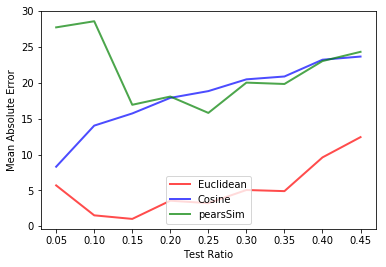

In [117]:
compare_sims(listings_eval_update_np)

#### Choose Euclidean as our metirc, so the results are:

In [121]:
query_index = np.random.choice(listings_eval_update.shape[0])
distances, indices = euc_knn.kneighbors(listings_eval_update.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [122]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print "Recommendation for {0}: \n".format(listings_eval_update.index[query_index])
    else:
        print "{0}: {1}, with distance of: {2}".format(i, listings_eval_update.index[indices.flatten()[i]], distances.flatten()[i])

Recommendation for 4485427: 

1: 14106050, with distance of: 5.56776436283
2: 2075284, with distance of: 5.83095189485
3: 14490975, with distance of: 6.5574385243
4: 1113259, with distance of: 6.63324958071
5: 11740335, with distance of: 7.61577310586
